In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

**1.EDA**

In [10]:
data_train=pd.read_csv('train.csv')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [4]:
data_train.info()      #get basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
survived_0=data_train.Pclass[data_train.Survived==0]
survived_0.value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

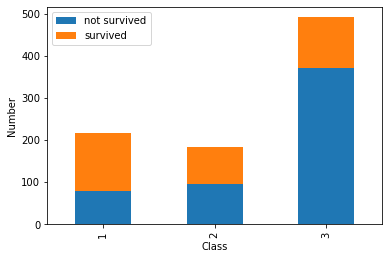

In [63]:
#divide by class

survived_0=data_train.Pclass[data_train.Survived==0].value_counts()
survived_1=data_train.Pclass[data_train.Survived==1].value_counts()
df=pd.DataFrame({'not survived':survived_0,'survived':survived_1})
df.plot(kind='bar',stacked=True)
plt.xlabel('Class')
plt.ylabel('Number')
plt.show() #show that upper class passengers have higher survival probability

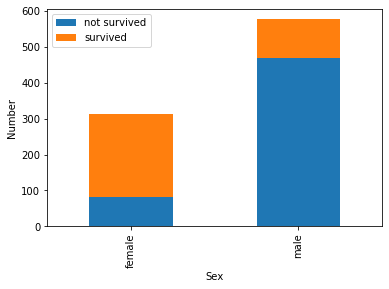

In [64]:
#divide by gender

sur_0=data_train.Sex[data_train.Survived==0].value_counts()
sur_1=data_train.Sex[data_train.Survived==1].value_counts()
df=pd.DataFrame({'not survived':sur_0,'survived':sur_1})
df.plot(kind='bar',stacked=True)
plt.xlabel('Sex')
plt.ylabel('Number')
plt.show()           #female>male

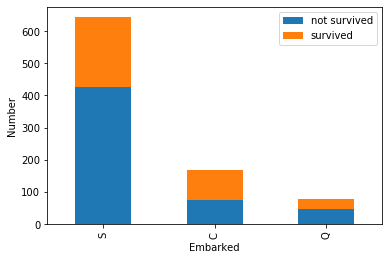

In [65]:
#divide by Embarked

sur_0=data_train.Embarked[data_train.Survived==0].value_counts()
sur_1=data_train.Embarked[data_train.Survived==1].value_counts()
df=pd.DataFrame({'not survived':sur_0,'survived':sur_1})
df.plot(kind='bar',stacked=True)
plt.xlabel('Embarked')
plt.ylabel('Number')
plt.show()           #C is likely to survive

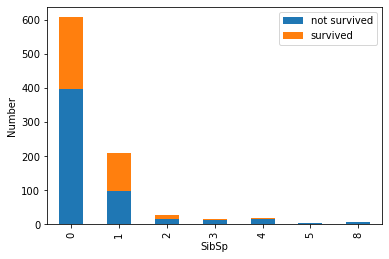

In [66]:
#divide by SibSp

sur_0=data_train.SibSp[data_train.Survived==0].value_counts()
sur_1=data_train.SibSp[data_train.Survived==1].value_counts()
df=pd.DataFrame({'not survived':sur_0,'survived':sur_1})
df.plot(kind='bar',stacked=True)
plt.xlabel('SibSp')
plt.ylabel('Number')
plt.show()    

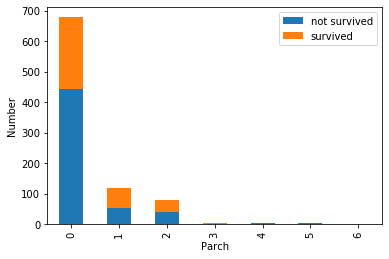

In [67]:
#divide by Parch

sur_0=data_train.Parch[data_train.Survived==0].value_counts()
sur_1=data_train.Parch[data_train.Survived==1].value_counts()
df=pd.DataFrame({'not survived':sur_0,'survived':sur_1})
df.plot(kind='bar',stacked=True)
plt.xlabel('Parch')
plt.ylabel('Number')
plt.show()   

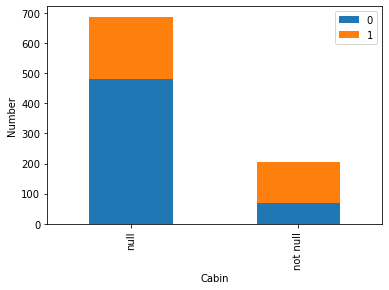

In [73]:
#Cabin has null values

#data_train.Cabin.value_counts()
sur_1=data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
sur_0=data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({'null':sur_0,'not null':sur_1}).transpose()
df.plot(kind='bar',stacked=True)
plt.xlabel('Cabin')
plt.ylabel('Number')
plt.show()          #

**2.Feature Engineering**

--Cabin: NotNull-->1, Null-->0 (get_dummies)
--Age: RandomForest fill in

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
def set_missing_ages(df):    #use 随机森林拟合缺失年龄数据??
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    
    known_age = age_df.loc[age_df.Age.notnull()].values
    unknown_age = age_df.loc[age_df.Age.isnull()].values    # .values: convert dataframe into numpy
    
    y = known_age[:, 0]           # only age column

    X = known_age[:, 1:]          # all x columns

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1:])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[df.Age.isnull(),'Age'] = predictedAges 
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[df.Cabin.notnull(),'Cabin']='Yes'
    df.loc[df.Cabin.isnull(),'Cabin']='No'
    return df


In [8]:
# age_df = data_train[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
# age_df.loc[age_df.Age.notnull()==True,'Age'].values[]

In [15]:
data_train, rfr=set_missing_ages(data_train)
data_train=set_Cabin_type(data_train)

In [7]:
data_train.info()    #no null values for Age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [114]:
df=pd.DataFrame({'cabin':['haha','sb',np.nan]})
df.cabin[df.cabin.notnull()]='Yes'
df.cabin[df.cabin.isnull()]='No'
df

,cabin
0,Yes
1,Yes
2,No


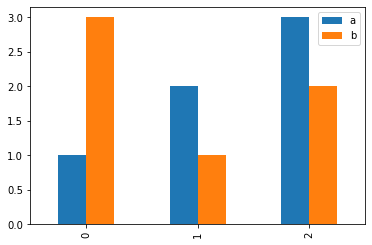

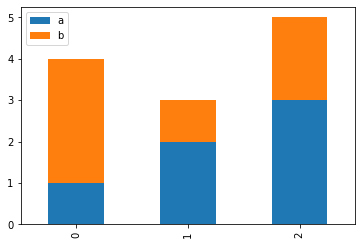

In [7]:
df=pd.DataFrame({'a':[1,2,3],'b':[3,1,2]})
df.plot(kind='bar')
df.plot(kind='bar',stacked=True)
plt.show

In [14]:
df=pd.DataFrame({'cabin':[1,2,3]})
print(type(df.values))
df.values

<class 'numpy.ndarray'>


array([[1],
       [2],
       [3]], dtype=int64)

In [72]:
df=pd.DataFrame({'a_A':[1,2,3],'a_S':[3,1,2],'c':[5,6,7],'d':[0,0,0]})
df.filter(regex='a_*|a_*|c')
#dff

,a_A,a_S,c
0,1,3,5
1,2,1,6
2,3,2,7


In [62]:
a=pd.DataFrame({'you':[2,2,2],'me':['yes','no','yes']})
dummies_a=pd.get_dummies(a['me'],prefix='me')
# aa=pd.concat([a,dummies_a],axis=1)
# aa.drop(['you','me'],axis=1,inplace=True)
# aa
dummies_a

,me_no,me_yes
0,0,1
1,1,0
2,0,1


In [18]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
df=pd.DataFrame({'a':[100,200,300],'b':[3,1,2]})
df['a'] = scaler.fit_transform(df[['a']])
df

,a,b
0,-1.224745,3
1,0.000000,1
2,1.224745,2


**get dummy**

In [19]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)           # axis=1
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)  #drop returns a copy automaticlly, use 
df                                                                                       #inplace=True to drop original data


,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.00000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.00000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.00000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.00000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.00000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.00000,0,0,13.0000,1,0,0,0,1,0,1,0,1,0
887,888,1,19.00000,0,0,30.0000,0,1,0,0,1,1,0,1,0,0
888,889,0,16.19395,1,2,23.4500,1,0,0,0,1,1,0,0,0,1
889,890,1,26.00000,0,0,30.0000,0,1,1,0,0,0,1,1,0,0


In [20]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])
df.describe()


,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02
mean,446.000000,0.383838,29.647248,0.523008,0.381594,32.204208,0.771044,0.228956,0.188552,0.086420,0.722783,0.352413,0.647587,0.242424,0.206510,0.551066,-2.591766e-16,3.987333e-18
std,257.353842,0.486592,13.629879,1.102743,0.806057,49.693429,0.420397,0.420397,0.391372,0.281141,0.447876,0.477990,0.477990,0.428790,0.405028,0.497665,1.000562e+00,1.000562e+00
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.145556e+00,-6.484217e-01
25%,223.500000,0.000000,21.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.347895e-01,-4.891482e-01
50%,446.000000,0.000000,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-4.751409e-02,-3.573909e-01
75%,668.500000,1.000000,36.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4.663519e-01,-2.424635e-02
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.696367e+00,9.667167e+00


**从df取出feature columns，转为numpy,用LogisticRegression**

In [15]:
from sklearn import linear_model

# 用正则取出我们要的属性值           since there are so many columns
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values
train_np

#y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression()
clf.fit(X, y)       #input numpy array
    
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
data_test = pd.read_csv("test.csv")
# data_test.info()
data_test.loc[data_test.Fare.isnull()==True,'Fare'] = np.mean(data_test['Fare'])     # there is one null value for Fare column

# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].values
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[data_test.Age.isnull()==True,'Age'] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test[['Age']])
df_test['Fare_scaled'] = scaler.fit_transform(df_test[['Fare']])
df_test


,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.498407
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.513274
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.465088
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.483466
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.418471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30.705727,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.019545,-0.494448
414,1306,39.000000,0,0,108.9000,0,1,1,0,0,1,0,1,0,0,0.649061,1.313753
415,1307,38.500000,0,0,7.2500,1,0,0,0,1,0,1,0,0,1,0.611112,-0.508792
416,1308,30.705727,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.019545,-0.494448


In [17]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)


In [18]:
pd.read_csv('logistic_regression_predictions.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


**3.Modelling**

In [28]:
from sklearn.model_selection import cross_val_score

In [30]:
all_data=df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X=all_data.values[:,1:]
y=all_data.values[:,0]

**Logistic**

In [32]:

clf = linear_model.LogisticRegression()
scores=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
print(scores.mean())

NameError: name 'linear_model' is not defined

**DecisionTree**

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(scores.mean())

0.7766995166656205


**RandomForest**

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
clf = RandomForestClassifier(n_estimators = 13)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(scores.mean())

0.8092210156299039


**NaiveBayes**

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
clf = GaussianNB()
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(scores.mean())

0.766612265394514


**SVM**

In [39]:
from sklearn.svm import SVC

In [40]:
clf = SVC()
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(scores.mean())

0.8237900947837549


**KNN**

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
clf = KNeighborsClassifier(n_neighbors = 13)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(scores.mean())

0.8092147385600402


**Select three >0.8 classifier: SVM, KNN, RandomForest**

In [23]:
all_data=df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X=all_data.values[:,1:]
y=all_data.values[:,0]

data_test = pd.read_csv("test.csv")
data_test.loc[data_test.Fare.isnull(),'Fare'] = np.mean(data_test['Fare'])     # there is one null value for Fare column


tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].values

X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[data_test.Age.isnull(),'Age'] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test[['Age']])
df_test['Fare_scaled'] = scaler.fit_transform(df_test[['Fare']])

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [43]:
clf_knn = KNeighborsClassifier(n_neighbors = 13)
clf_knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("test_knn.csv", index=False)

In [44]:
clf_rdf = RandomForestClassifier(n_estimators = 13)
clf_rdf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("test_knn.rdf", index=False)

In [45]:
clf_svm = SVC()
clf_svm.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
# test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# predictions = clf.predict(test)
# result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
# result.to_csv("logistic_regression_predictions.csv", index=False)

**Model Ensemble: Voting**

In [47]:
from sklearn.ensemble import VotingClassifier

In [42]:
test_knn = pd.read_csv('test_knn.csv')
test_svm = pd.read_csv('test_svm.csv')
test_rdf = pd.read_csv('test_rdf.csv')

In [49]:
estims=[('knn',clf_knn),('rdf',clf_rdf),('svm',clf_svm)]
ensemble = VotingClassifier(estimators=estims,voting='hard')


In [51]:
ensemble.fit(X,y)
cross_val_score(ensemble, X, y, cv=5, scoring='accuracy').mean()

0.8215554579122465

In [52]:
predictions = ensemble.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("test_ensemble.csv", index=False)